In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import t
import math

In [2]:
file = 'Experience-Salary.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [5]:
# Considered as population

mean_p = df['salary(in thousands)'].mean()
stdv_p = df['salary(in thousands)'].std()
lenght_p = len(df['salary(in thousands)'])
mean_p, stdv_p, lenght_p

(26.722597279127935, 8.844760689776583, 1000)

In [6]:
sample = df['salary(in thousands)'].sample(n=30)

In [7]:
# Considered as samples

mean_s = sample.mean()
stdv_s = sample.std()
lenght_s = len(sample)
mean_s, stdv_s, lenght_s

(29.060755522989634, 7.777439867348922, 30)

In [8]:
sample_mean = []

for i in range(0,30):
    sample_mean.append(df['salary(in thousands)'].sample(n=30).mean())

print(sample_mean)

[28.252596104748118, 25.717203332355673, 26.70492093809587, 26.912567570351484, 24.24680545628666, 26.419776898385816, 27.664501968663, 25.07760847776195, 24.599933018735804, 26.756819770830997, 29.534154278998383, 24.243703471191388, 25.95162447789813, 26.05014971143566, 28.0732288025218, 24.345551088409866, 26.528664988487712, 24.568472611725376, 26.883624634865416, 27.42307980751883, 24.17257801979872, 26.9492835035314, 28.459862993316566, 28.140248787654667, 27.10101058124411, 26.859440847804915, 24.25124757882112, 28.254297582579643, 27.841430634052053, 25.515144481419515]


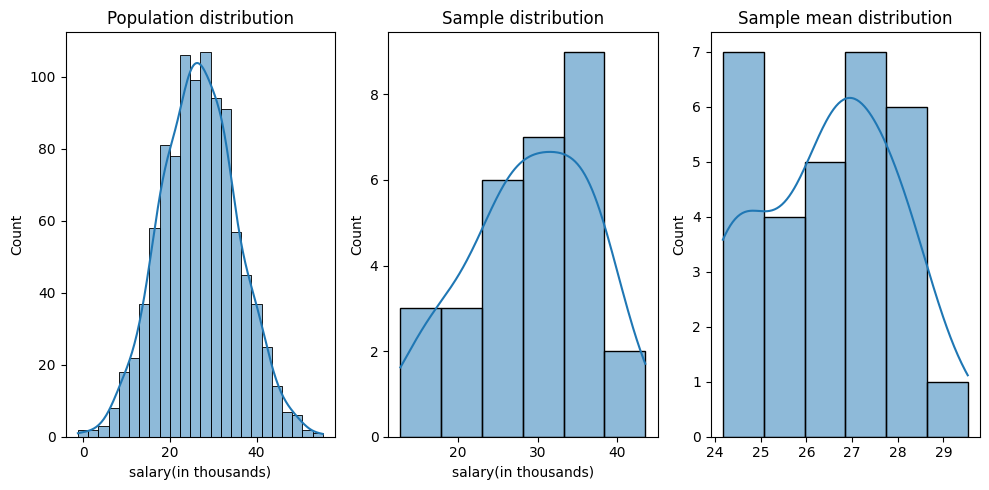

Population size: n = 1000 , mean = 26.72, std.dev. = 8.84

Sample size: n = 30 , mean = 29.06, std.dev. = 7.78

Sample size: n = 30


In [9]:
fig, ax = plt.subplots(1,3, figsize = (10,5))

sns.histplot(df['salary(in thousands)'], kde=True, ax=ax[0])
ax[0].set_title('Population distribution')
sns.histplot(sample, kde=True, ax=ax[1])
ax[1].set_title('Sample distribution')
sns.histplot(sample_mean, kde=True, ax=ax[2])
ax[2].set_title('Sample mean distribution')

fig.tight_layout()
plt.show()

print(f'Population size: n = {lenght_p} , mean = {mean_p:.2f}, std.dev. = {stdv_p:.2f}\n')
print(f'Sample size: n = {lenght_s} , mean = {mean_s:.2f}, std.dev. = {stdv_s:.2f}\n')
print(f'Sample size: n = {len(sample_mean)}')

### Hypotesis definition

1. H0 = deviation of population = 26k
2. H1 = deviation of population != 26k

alpha = 0.05

In [10]:
H0 = 26
alpha = 0.05

In [11]:
print(f'Hypotesis of population mean mu_null = {H0}\n')
print(f'Sample mean = {mean_s}')
print(f'Sample standard deviation = {stdv_s}')
print(f'Sample n. {lenght_s}')

Hypotesis of population mean mu_null = 26

Sample mean = 29.060755522989634
Sample standard deviation = 7.777439867348922
Sample n. 30


In [12]:
t_test_result = ((mean_s-H0)/stdv_s) * math.sqrt(lenght_s)

In [13]:
t_test_result

2.1555227318284502

In [14]:
t_stat, p_value = stats.ttest_1samp(sample, H0)

In [15]:
t_stat

2.1555227318284502

In [16]:
def results(p_value, alpha):
    if p_value > alpha/2:
        print(f'Null hypothesis cannot be rejected.')
    else:
        print(f'Null hypothesis rejected.')

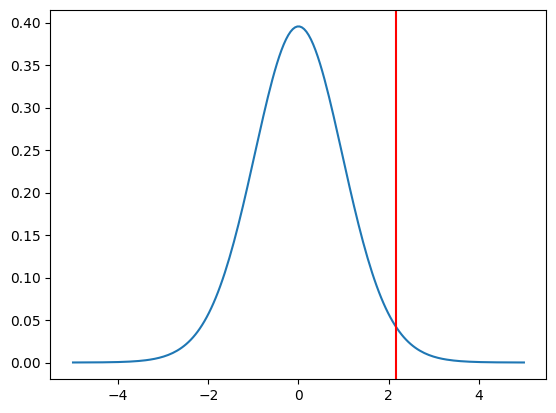

In [17]:
X = np.linspace(-5,5,200)
Y = t.pdf(X, df=29)

plt.plot(X,Y)
plt.axvline(x = t_stat, color = 'r')
plt.show()

In [18]:
results(p_value, alpha)

Null hypothesis cannot be rejected.


In [19]:
results_interval = stats.t.interval(confidence = 0.95, df=lenght_s-1, loc = np.mean(sample), scale = stats.sem(sample))

In [20]:
results_interval

(26.156611748254445, 31.964899297724823)

In [21]:
mean_s

29.060755522989634

In [22]:
H0

26

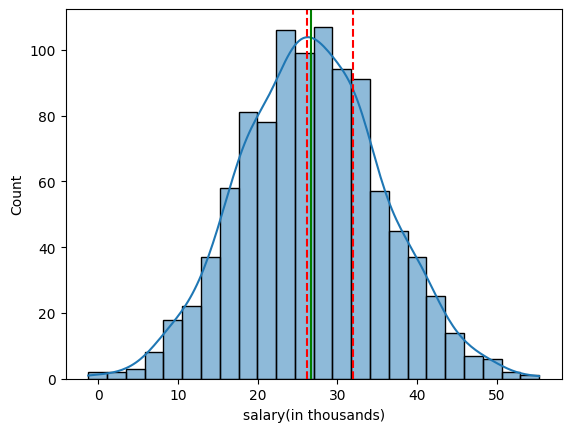

In [23]:
sns.histplot(df['salary(in thousands)'], kde=True)
plt.axvline(x = results_interval[0], color = 'r', linestyle = '--')
plt.axvline(x = results_interval[1], color = 'r', linestyle = '--')
plt.axvline(x = df['salary(in thousands)'].mean(), color = 'g')
plt.show()

In [24]:
print(f'Based on {lenght_s} of samples from population of {len(df)} with confidence of 95% population mean lays within interval of {results_interval[0]}k$ and {results_interval[1]}k$.')
print(f"The real population mean is {df['salary(in thousands)'].mean()}")

Based on 30 of samples from population of 1000 with confidence of 95% population mean lays within interval of 26.156611748254445k$ and 31.964899297724823k$.
The real population mean is 26.722597279127935
